In [1]:
import numpy as np
from matplotlib import pyplot as plt

from dftpy.ions import Ions
from dftpy.functional import Functional
from dftpy.formats import io

from ase.io import read
from ase.lattice.spacegroup import Spacegroup
from ase.lattice.spacegroup import crystal

from scipy.optimize import minimize
import numpy as np
from matplotlib import pyplot as plt

from ase.io import read
from ase.lattice.spacegroup import Spacegroup
from ase.lattice.spacegroup import crystal

from scipy.optimize import minimize

from dftpy.ions import Ions
from dftpy.functional import Functional
from dftpy.formats import io
from dftpy.ions import Ions
from dftpy.field import DirectField
from dftpy.grid import DirectGrid
from dftpy.functional import LocalPseudo, Functional, TotalFunctional, ExternalPotential
from dftpy.formats import io
from dftpy.math_utils import ecut2nr
from dftpy.optimization import Optimization

from ase.build import bulk


/opt/homebrew/lib/python3.11/site-packages/ase/lattice/spacegroup.py:5: UserWarning: Moved to ase.spacegroup
  warnings.warn('Moved to ase.spacegroup')


In [2]:
with open('he.out') as D:
    k = [match for match in D if "Kinetic energy" in match]
KS_ke = str(k).split()[6]


In [3]:
path_pp='/Users/valeria/Documents/PP/psl/'
file1='He.pz-rrkjus_psl.1.0.0.UPF'
PP_list = {'He': path_pp+file1}

In [4]:
XC = Functional(type='XC',name='LDA')
HARTREE = Functional(type='HARTREE')

In [5]:
def get_ions(path_file):
    inputfile = path_file
    ions = read(inputfile, format='vasp')
    return ions

In [6]:
material = Ions.from_ase(get_ions('he.vasp'))

In [32]:
def min_delta_rho(x0, *args):
    rho_ks, ions = args
    KE = Functional(type='KEDF',name='WT', rho0=x0, sigma=0.02)
    TF = Functional(type='KEDF', name='TF')
    vW = Functional(type='KEDF', name='vW')
#     ions.set_charges(2)
#     grid = DirectGrid(lattice=ions.cell, nr=[len(rho_ks),len(rho_ks),len(rho_ks[0,0])])
#     rho_ini = DirectField(grid=grid)
#     rho_ini[:] = ions.get_ncharges()/ions.cell.volume 
#     PSEUDO = LocalPseudo(grid = grid, ions=ions, PP_list=PP_list, rcut=10)
#     evaluator = TotalFunctional(KE=KE, XC=XC, HARTREE=HARTREE, PSEUDO=PSEUDO)
#     optimization_options = {'econv' : 1e-5*ions.nat}
#     opt = Optimization(EnergyEvaluator=evaluator, optimization_options = optimization_options, 
#                        optimization_method = 'CG')
#     rho = opt.optimize_rho(guess_rho=rho_ini)
#     rho_ini[:]=rho
#     diff = 0.5 * (np.abs(rho - rho_ks)).integral()
    tf = TF(rho_ks).energy
    ke = KE(rho_ks).energy
    vw = vW(rho_ks).energy
#     print(diff)
    return vw, tf, ke

In [8]:
def min_energy(x0, *args):
        KS_KE, rho = args
        KE = Functional(type='KEDF',name='WT', rho0=x0)
        OF_KE = KE(rho).energy
        diff = np.abs(KS_KE*1/2-OF_KE)
        return diff

In [9]:
rho_ks = io.read_density('he.xsf')
# KS_KE = float(KS_ke)
# minn = minimize(min_delta_rho, 1e-9, args = (rho_ks, material), method='L-BFGS-B', bounds=[[0,5]], options={'ftol' : 1e-4})

In [34]:
vw, tf, ke = min_delta_rho(1e-6,rho_ks, material)

In [36]:
vw, tf, ke

(2.498277227554556, 2.3351514982224977, 1.8468713683083777)

In [46]:
(ke - vw)/tf

-0.2789565729427081

In [47]:
(ke - vw)

-0.6514058592461782

In [ ]:
min_delta_rho(1e-3,rho_ks, material)

In [10]:
min_delta_rho(1e-4,rho_ks, material)

setting key: He -> /Users/valeria/Documents/PP/psl/He.pz-rrkjus_psl.1.0.0.UPF
Step    Energy(a.u.)            dE              dP              Nd      Nls     Time(s)         
0       -4.120160008539E-01     -4.120160E-01   3.435016E-02    1       1       4.103308E-01    
1       -2.061487867697E+00     -1.649472E+00   1.707753E+00    1       5       1.180358E+00    
2       -2.156085476765E+00     -9.459761E-02   3.810642E+00    1       3       1.653408E+00    
3       -2.191140920429E+00     -3.505544E-02   2.331116E+00    1       2       1.971498E+00    
4       -2.234840486539E+00     -4.369957E-02   4.787020E+00    1       2       2.283020E+00    
5       -2.295463311922E+00     -6.062283E-02   6.132236E+00    1       2       2.591392E+00    
6       -2.362275890876E+00     -6.681258E-02   4.481997E+00    1       1       2.752296E+00    
7       -2.420565940429E+00     -5.829005E-02   7.453345E+00    1       1       2.913617E+00    
8       -2.487447362198E+00     -6.688142E-02   5

0.06661307016455606

In [15]:
min_delta_rho(0.00806902,rho_ks, material)

setting key: He -> /Users/valeria/Documents/PP/psl/He.pz-rrkjus_psl.1.0.0.UPF
Step    Energy(a.u.)            dE              dP              Nd      Nls     Time(s)         
0       -4.120160008539E-01     -4.120160E-01   3.435016E-02    1       1       3.908951E-01    
1       -1.944944596701E+00     -1.532929E+00   1.745349E+00    1       5       1.201171E+00    
2       -2.047895963911E+00     -1.029514E-01   4.010152E+00    1       3       1.693094E+00    
3       -2.087628594064E+00     -3.973263E-02   2.688280E+00    1       2       2.017931E+00    
4       -2.141337993701E+00     -5.370940E-02   5.630267E+00    1       2       2.352420E+00    
5       -2.217959568151E+00     -7.662157E-02   7.394198E+00    1       2       2.701565E+00    
6       -2.299612599732E+00     -8.165303E-02   6.020317E+00    1       1       2.876233E+00    
7       -2.369660254406E+00     -7.004765E-02   9.431546E+00    1       1       3.036827E+00    
8       -2.452957756602E+00     -8.329750E-02   6

0.12385457935337003

In [14]:
min_delta_rho(0.07137737,rho_ks, material)

setting key: He -> /Users/valeria/Documents/PP/psl/He.pz-rrkjus_psl.1.0.0.UPF
Step    Energy(a.u.)            dE              dP              Nd      Nls     Time(s)         
0       -4.120160008539E-01     -4.120160E-01   3.435016E-02    1       1       4.428501E-01    
1       -1.704005528756E+00     -1.291990E+00   1.383732E+00    1       5       1.281933E+00    
2       -1.771737736317E+00     -6.773221E-02   2.371538E+00    1       3       1.759192E+00    
3       -1.792950692027E+00     -2.121296E-02   1.407848E+00    1       2       2.082667E+00    
4       -1.814703410824E+00     -2.175272E-02   1.450815E+00    1       1       2.262581E+00    
5       -1.842840610100E+00     -2.813720E-02   2.808294E+00    1       2       2.600534E+00    
6       -1.873368198456E+00     -3.052759E-02   2.594939E+00    1       2       2.949234E+00    
7       -1.901380531628E+00     -2.801233E-02   2.891855E+00    1       1       3.131765E+00    
8       -1.941827196473E+00     -4.044666E-02   4

83      -2.194638037512E+00     -1.206916E-05   8.814811E-04    1       2       1.999906E+01    
84      -2.194646827992E+00     -8.790480E-06   1.191128E-03    1       1       2.015287E+01    
85      -2.194655549390E+00     -8.721398E-06   8.699683E-04    1       1       2.030622E+01    
86      -2.194663276397E+00     -7.727007E-06   5.870337E-04    1       2       2.060017E+01    
87      -2.194669119014E+00     -5.842617E-06   4.574279E-04    1       2       2.089298E+01    
88      -2.194673466069E+00     -4.347055E-06   5.021736E-04    1       1       2.105142E+01    
89      -2.194677996832E+00     -4.530763E-06   4.021377E-04    1       1       2.120733E+01    
#### Density Optimization Converged ####
Chemical potential (a.u.): -0.24829603941552617
Chemical potential (eV)  : -6.756479376857387
0.12343596776833682


0.12343596776833682

In [43]:
min_delta_rho(1e-7,rho_ks, material)

setting key: He -> /Users/valeria/Documents/PP/psl/He.pz-rrkjus_psl.1.0.0.UPF
Step    Energy(a.u.)            dE              dP              Nd      Nls     Time(s)         
0       -4.120160008539E-01     -4.120160E-01   3.435016E-02    1       1       2.781250E-01    
1       -2.051291280708E+00     -1.639275E+00   1.703231E+00    1       5       1.021752E+00    
2       -2.146108019446E+00     -9.481674E-02   3.771227E+00    1       3       1.477575E+00    
3       -2.180458400005E+00     -3.435038E-02   2.356123E+00    1       2       1.775319E+00    
4       -2.223575041938E+00     -4.311664E-02   4.746175E+00    1       2       2.073843E+00    
5       -2.283835132103E+00     -6.026009E-02   5.867163E+00    1       2       2.366424E+00    
6       -2.350466037311E+00     -6.663091E-02   4.330892E+00    1       1       2.517509E+00    
7       -2.408008619147E+00     -5.754258E-02   7.260004E+00    1       1       2.664923E+00    
8       -2.477189240804E+00     -6.918062E-02   7

0.06668380769835179

In [44]:
min_delta_rho(1e-6,rho_ks, material)

setting key: He -> /Users/valeria/Documents/PP/psl/He.pz-rrkjus_psl.1.0.0.UPF
Step    Energy(a.u.)            dE              dP              Nd      Nls     Time(s)         
0       -4.120160008539E-01     -4.120160E-01   3.435016E-02    1       1       2.899361E-01    
1       -2.051585175000E+00     -1.639569E+00   1.703426E+00    1       5       1.035048E+00    
2       -2.146230364783E+00     -9.464519E-02   3.785036E+00    1       3       1.495302E+00    
3       -2.180702126590E+00     -3.447176E-02   2.345166E+00    1       2       1.794352E+00    
4       -2.223747455118E+00     -4.304533E-02   4.730542E+00    1       2       2.086736E+00    
5       -2.283994693995E+00     -6.024724E-02   5.866638E+00    1       2       2.372662E+00    
6       -2.350643340018E+00     -6.664865E-02   4.331723E+00    1       1       2.520246E+00    
7       -2.408410483841E+00     -5.776714E-02   7.227253E+00    1       1       2.669121E+00    
8       -2.474309628460E+00     -6.589914E-02   5

0.0656723813760336

In [38]:
min_delta_rho(1.5,rho_ks, material)

setting key: He -> /Users/valeria/Documents/PP/psl/He.pz-rrkjus_psl.1.0.0.UPF
Step    Energy(a.u.)            dE              dP              Nd      Nls     Time(s)         
0       -4.120160008539E-01     -4.120160E-01   3.435016E-02    1       1       2.722063E-01    
1       -1.319403118928E+00     -9.073871E-01   1.186916E+00    1       5       9.918082E-01    
2       -1.378567123274E+00     -5.916400E-02   1.071358E+00    1       2       1.280318E+00    
3       -1.390269647272E+00     -1.170252E-02   9.359919E-01    1       2       1.586248E+00    
4       -1.401977425051E+00     -1.170778E-02   1.013599E+00    1       2       1.883709E+00    
5       -1.411464998548E+00     -9.487573E-03   8.856484E-01    1       1       2.035438E+00    
6       -1.417379606968E+00     -5.914608E-03   4.289564E-01    1       2       2.323268E+00    
7       -1.420980321817E+00     -3.600715E-03   2.857031E-01    1       2       2.616696E+00    
8       -1.424486635146E+00     -3.506313E-03   2

83      -1.449173206699E+00     -8.152102E-06   6.696181E-04    1       1       1.729320E+01    
84      -1.449180473258E+00     -7.266559E-06   5.593856E-04    1       2       1.758648E+01    
85      -1.449187182238E+00     -6.708980E-06   5.805271E-04    1       1       1.773918E+01    
86      -1.449194130899E+00     -6.948661E-06   4.661025E-04    1       1       1.789392E+01    
87      -1.449200117425E+00     -5.986526E-06   5.522459E-04    1       1       1.804509E+01    
88      -1.449207004368E+00     -6.886942E-06   7.134265E-04    1       2       1.834890E+01    
89      -1.449214589093E+00     -7.584725E-06   5.228220E-04    1       1       1.849468E+01    
90      -1.449220755854E+00     -6.166761E-06   4.982546E-04    1       2       1.878483E+01    
91      -1.449226675539E+00     -5.919685E-06   4.844375E-04    1       1       1.893343E+01    
92      -1.449233170218E+00     -6.494679E-06   3.978260E-04    1       1       1.907958E+01    
93      -1.449238615155E+00   

0.8360087867127698

In [16]:
np.save('rho_DEN', minn.x)

In [18]:
# rho0 = np.linspace(0, 0.001, 10)
rho0 = [1e-7, 1e-6, 1e-4, 1e-3, 1e-2, 0.02, 1e-1]
diff = []
for i in rho0:
    diff.append(min_delta_rho(i,rho_ks, material))

setting key: He -> /Users/valeria/Documents/PP/psl/He.pz-rrkjus_psl.1.0.0.UPF
Step    Energy(a.u.)            dE              dP              Nd      Nls     Time(s)         
0       -4.120160008539E-01     -4.120160E-01   3.435016E-02    1       1       3.853571E-01    
1       -2.051291280708E+00     -1.639275E+00   1.703231E+00    1       5       1.324139E+00    
2       -2.146108019446E+00     -9.481674E-02   3.771227E+00    1       3       1.875208E+00    
3       -2.180458400005E+00     -3.435038E-02   2.356123E+00    1       2       2.272537E+00    
4       -2.223575041938E+00     -4.311664E-02   4.746175E+00    1       2       2.637722E+00    
5       -2.283835132103E+00     -6.026009E-02   5.867163E+00    1       2       3.006138E+00    
6       -2.350466037311E+00     -6.663091E-02   4.330892E+00    1       1       3.202943E+00    
7       -2.408008619147E+00     -5.754258E-02   7.260004E+00    1       1       3.404647E+00    
8       -2.477189240804E+00     -6.918062E-02   7

16      -2.753313185414E+00     -1.234192E-02   1.622608E+00    1       1       5.712983E+00    
17      -2.764426342250E+00     -1.111316E-02   9.870878E-01    1       2       6.088089E+00    
18      -2.773263082402E+00     -8.836740E-03   6.551911E-01    1       2       6.525809E+00    
19      -2.779652067072E+00     -6.388985E-03   6.645202E-01    1       1       6.740131E+00    
20      -2.784809942522E+00     -5.157875E-03   5.595893E-01    1       1       6.992562E+00    
21      -2.789713015463E+00     -4.903073E-03   5.023552E-01    1       1       7.179555E+00    
22      -2.794295441611E+00     -4.582426E-03   4.776762E-01    1       1       7.376980E+00    
23      -2.799191273626E+00     -4.895832E-03   4.002835E-01    1       1       7.558122E+00    
24      -2.803498011195E+00     -4.306738E-03   3.872967E-01    1       1       7.736670E+00    
25      -2.806897149379E+00     -3.399138E-03   3.673210E-01    1       1       7.918212E+00    
26      -2.810557982598E+00   

32      -2.839952392576E+00     -1.787437E-03   1.397298E-01    1       2       9.051641E+00    
33      -2.841292893255E+00     -1.340501E-03   1.004289E-01    1       2       9.405193E+00    
34      -2.842236628331E+00     -9.437351E-04   6.848560E-02    1       2       9.758536E+00    
35      -2.842882598062E+00     -6.459697E-04   4.691050E-02    1       2       1.011049E+01    
36      -2.843386408312E+00     -5.038103E-04   5.181070E-02    1       1       1.030110E+01    
37      -2.843872463724E+00     -4.860554E-04   3.884196E-02    1       1       1.048666E+01    
38      -2.844280766738E+00     -4.083030E-04   3.070006E-02    1       2       1.086667E+01    
39      -2.844608506976E+00     -3.277402E-04   3.011294E-02    1       1       1.104881E+01    
40      -2.844908930661E+00     -3.004237E-04   2.575993E-02    1       1       1.123379E+01    
41      -2.845182130249E+00     -2.731996E-04   2.648246E-02    1       1       1.141026E+01    
42      -2.845452500417E+00   

51      -2.870003869722E+00     -3.716380E-05   3.089782E-03    1       2       1.468137E+01    
52      -2.870034639227E+00     -3.076950E-05   2.938955E-03    1       1       1.486991E+01    
53      -2.870064034832E+00     -2.939560E-05   2.315584E-03    1       1       1.505686E+01    
54      -2.870089957103E+00     -2.592227E-05   2.342448E-03    1       1       1.525251E+01    
55      -2.870112176084E+00     -2.221898E-05   1.919735E-03    1       1       1.547362E+01    
56      -2.870130014480E+00     -1.783840E-05   1.966560E-03    1       1       1.567494E+01    
57      -2.870144015983E+00     -1.400150E-05   1.724585E-03    1       1       1.594023E+01    
58      -2.870156458723E+00     -1.244274E-05   1.062917E-03    1       2       1.631616E+01    
59      -2.870166249416E+00     -9.790693E-06   7.316015E-04    1       2       1.669911E+01    
60      -2.870173489882E+00     -7.240465E-06   8.104932E-04    1       1       1.688956E+01    
61      -2.870180379669E+00   

0.1330014580037764
setting key: He -> /Users/valeria/Documents/PP/psl/He.pz-rrkjus_psl.1.0.0.UPF
Step    Energy(a.u.)            dE              dP              Nd      Nls     Time(s)         
0       -4.120160008539E-01     -4.120160E-01   3.435016E-02    1       1       3.163602E-01    
1       -1.857802003299E+00     -1.445786E+00   1.656586E+00    1       5       1.203677E+00    
2       -1.951299061345E+00     -9.349706E-02   3.751270E+00    1       3       1.724136E+00    
3       -1.986830440738E+00     -3.553138E-02   2.352345E+00    1       2       2.098090E+00    
4       -2.031186668262E+00     -4.435623E-02   4.703221E+00    1       2       2.511107E+00    
5       -2.095077323008E+00     -6.389065E-02   6.195220E+00    1       2       2.916477E+00    
6       -2.167000060011E+00     -7.192274E-02   4.500283E+00    1       1       3.121256E+00    
7       -2.230693080448E+00     -6.369302E-02   7.843362E+00    1       1       3.335632E+00    
8       -2.302886185176E+00   

11      -1.904600564469E+00     -1.950982E-02   1.646674E+00    1       1       3.766620E+00    
12      -1.925062486434E+00     -2.046192E-02   1.446506E+00    1       1       3.938390E+00    
13      -1.941727221078E+00     -1.666473E-02   1.529750E+00    1       1       4.106364E+00    
14      -1.953679394869E+00     -1.195217E-02   1.076110E+00    1       2       4.440234E+00    
15      -1.965177493418E+00     -1.149810E-02   1.199197E+00    1       1       4.611733E+00    
16      -1.973824108423E+00     -8.646615E-03   6.177946E-01    1       2       4.965933E+00    
17      -1.979594572682E+00     -5.770464E-03   4.186605E-01    1       2       5.325325E+00    
18      -1.983674089134E+00     -4.079516E-03   2.902283E-01    1       2       5.677614E+00    
19      -1.986557407898E+00     -2.883319E-03   2.352854E-01    1       2       6.014993E+00    
20      -1.988977462831E+00     -2.420055E-03   1.907243E-01    1       1       6.193196E+00    
21      -1.990827520011E+00   

Chemical potential (eV)  : -4.833651067137862
0.1309747645090741


In [20]:
rho01 = np.linspace(0, 0.2, 4)
diff1 = []
for i in rho01:
    diff1.append(min_delta_rho(i,rho_ks, material))

setting key: He -> /Users/valeria/Documents/PP/psl/He.pz-rrkjus_psl.1.0.0.UPF
Step    Energy(a.u.)            dE              dP              Nd      Nls     Time(s)         
0       -4.120160008539E-01     -4.120160E-01   3.435016E-02    1       1       3.587813E-01    
1       -2.067214698293E+00     -1.655199E+00   1.714908E+00    1       5       1.295605E+00    
2       -2.162970908777E+00     -9.575621E-02   3.820172E+00    1       3       1.871379E+00    
3       -2.198095326696E+00     -3.512442E-02   2.401797E+00    1       2       2.245005E+00    
4       -2.242613382589E+00     -4.451806E-02   4.844260E+00    1       2       2.608137E+00    
5       -2.304656833013E+00     -6.204345E-02   6.172820E+00    1       2       2.985124E+00    
6       -2.373350150564E+00     -6.869332E-02   4.470339E+00    1       1       3.179078E+00    
7       -2.430661054038E+00     -5.731090E-02   8.270948E+00    1       1       3.367047E+00    
8       -2.497948065066E+00     -6.728701E-02   5

16      -2.175060587426E+00     -1.024384E-02   8.658763E-01    1       2       5.717697E+00    
17      -2.182842474486E+00     -7.781887E-03   5.366691E-01    1       2       6.104738E+00    
18      -2.188100335389E+00     -5.257861E-03   5.728552E-01    1       1       6.285470E+00    
19      -2.192136624039E+00     -4.036289E-03   5.138067E-01    1       1       6.490638E+00    
20      -2.196073325573E+00     -3.936702E-03   4.031043E-01    1       1       6.684510E+00    
21      -2.199057045971E+00     -2.983720E-03   2.384294E-01    1       2       7.026051E+00    
22      -2.201601989661E+00     -2.544944E-03   1.864013E-01    1       2       7.385604E+00    
23      -2.203520961686E+00     -1.918972E-03   1.755865E-01    1       1       7.556730E+00    
24      -2.205161354069E+00     -1.640392E-03   1.588197E-01    1       1       7.738522E+00    
25      -2.206960306032E+00     -1.798952E-03   1.269681E-01    1       1       7.913870E+00    
26      -2.208605033393E+00   

5       -1.712096320428E+00     -1.394172E-02   1.233814E+00    1       2       2.459705E+00    
6       -1.726328172150E+00     -1.423185E-02   8.835855E-01    1       1       2.642756E+00    
7       -1.738392679812E+00     -1.206451E-02   1.230567E+00    1       1       2.819671E+00    
8       -1.753304605757E+00     -1.491193E-02   1.508215E+00    1       2       3.149215E+00    
9       -1.770820776382E+00     -1.751617E-02   1.049874E+00    1       1       3.323157E+00    
10      -1.784819182189E+00     -1.399841E-02   1.159333E+00    1       2       3.657876E+00    
11      -1.797603303189E+00     -1.278412E-02   9.443697E-01    1       1       3.842558E+00    
12      -1.811181434051E+00     -1.357813E-02   9.147638E-01    1       1       4.039452E+00    
13      -1.821894156383E+00     -1.071272E-02   9.283663E-01    1       1       4.219011E+00    
14      -1.830348165394E+00     -8.454009E-03   8.520069E-01    1       1       4.399507E+00    
15      -1.838926141743E+00   

90      -1.873244225345E+00     -9.729052E-06   7.173733E-04    1       2       2.170788E+01    
91      -1.873251421050E+00     -7.195706E-06   6.356174E-04    1       2       2.207174E+01    
92      -1.873258191275E+00     -6.770225E-06   5.901494E-04    1       1       2.224676E+01    
93      -1.873264527628E+00     -6.336353E-06   5.754854E-04    1       1       2.242165E+01    
94      -1.873270918973E+00     -6.391344E-06   4.603881E-04    1       1       2.259533E+01    
95      -1.873276112459E+00     -5.193487E-06   5.579672E-04    1       1       2.276510E+01    
96      -1.873281558518E+00     -5.446058E-06   4.324671E-04    1       1       2.293491E+01    
97      -1.873286494078E+00     -4.935560E-06   3.617760E-04    1       2       2.328488E+01    
98      -1.873290604376E+00     -4.110298E-06   3.563951E-04    1       1       2.346632E+01    
#### Density Optimization Converged ####
Chemical potential (a.u.): -0.15468262886153042
Chemical potential (eV)  : -4.20912872

73      -1.719486348966E+00     -4.215744E-05   3.627565E-03    1       2       1.739571E+01    
74      -1.719519278032E+00     -3.292907E-05   2.238863E-03    1       2       1.775846E+01    
75      -1.719542805188E+00     -2.352716E-05   2.127210E-03    1       2       1.810550E+01    
76      -1.719566698935E+00     -2.389375E-05   1.801650E-03    1       1       1.828915E+01    
77      -1.719588465880E+00     -2.176695E-05   1.643888E-03    1       1       1.848289E+01    
78      -1.719606193916E+00     -1.772804E-05   1.899436E-03    1       1       1.866875E+01    
79      -1.719626113184E+00     -1.991927E-05   1.418026E-03    1       1       1.886122E+01    
80      -1.719642365404E+00     -1.625222E-05   2.065649E-03    1       1       1.903736E+01    
81      -1.719659380341E+00     -1.701494E-05   1.460423E-03    1       1       1.921748E+01    
82      -1.719674499513E+00     -1.511917E-05   1.049988E-03    1       2       1.958440E+01    
83      -1.719685745448E+00   

In [24]:
rho02 = np.linspace(0.2, 0.5, 5)
diff2 = []
for i in rho01:
    diff1.append(min_delta_rho(i,rho_ks, material))

setting key: He -> /Users/valeria/Documents/PP/psl/He.pz-rrkjus_psl.1.0.0.UPF
Step    Energy(a.u.)            dE              dP              Nd      Nls     Time(s)         
0       -4.120160008539E-01     -4.120160E-01   3.435016E-02    1       1       3.482120E-01    
1       -1.561764100918E+00     -1.149748E+00   1.102992E+00    1       4       1.157076E+00    
2       -1.605258014838E+00     -4.349391E-02   1.556349E+00    1       3       1.722675E+00    
3       -1.616721795230E+00     -1.146378E-02   6.267199E-01    1       2       2.070355E+00    
4       -1.625008744235E+00     -8.286949E-03   8.801246E-01    1       1       2.257394E+00    
5       -1.632880324339E+00     -7.871580E-03   6.251153E-01    1       1       2.443095E+00    
6       -1.640771990457E+00     -7.891666E-03   5.202760E-01    1       1       2.634158E+00    
7       -1.646151370124E+00     -5.379380E-03   6.465352E-01    1       1       2.821128E+00    
8       -1.652965402581E+00     -6.814032E-03   7

83      -1.719685745448E+00     -1.124593E-05   1.063957E-03    1       1       2.116695E+01    
84      -1.719697109650E+00     -1.136420E-05   9.407161E-04    1       1       2.135018E+01    
85      -1.719708617609E+00     -1.150796E-05   8.844847E-04    1       1       2.154023E+01    
86      -1.719718715832E+00     -1.009822E-05   8.670443E-04    1       1       2.171431E+01    
87      -1.719728761086E+00     -1.004525E-05   8.176542E-04    1       1       2.190681E+01    
88      -1.719738567127E+00     -9.806042E-06   7.213218E-04    1       1       2.210123E+01    
89      -1.719747563337E+00     -8.996210E-06   6.796539E-04    1       1       2.228123E+01    
90      -1.719756550893E+00     -8.987556E-06   5.788146E-04    1       1       2.246354E+01    
91      -1.719764643249E+00     -8.092356E-06   6.409398E-04    1       1       2.263700E+01    
92      -1.719773181461E+00     -8.538212E-06   8.108301E-04    1       2       2.298418E+01    
93      -1.719782255659E+00   

63      -1.633484483900E+00     -7.515749E-05   8.320450E-03    1       1       1.470788E+01    
64      -1.633554874739E+00     -7.039084E-05   8.334295E-03    1       1       1.488641E+01    
65      -1.633622975713E+00     -6.810097E-05   7.871510E-03    1       1       1.507828E+01    
66      -1.633687214915E+00     -6.423920E-05   7.340200E-03    1       1       1.525261E+01    
67      -1.633745441526E+00     -5.822661E-05   5.403076E-03    1       2       1.560284E+01    
68      -1.633797946908E+00     -5.250538E-05   3.544559E-03    1       2       1.594657E+01    
69      -1.633838060095E+00     -4.011319E-05   3.408771E-03    1       2       1.628723E+01    
70      -1.633876244937E+00     -3.818484E-05   3.332295E-03    1       1       1.647394E+01    
71      -1.633911425883E+00     -3.518095E-05   3.094625E-03    1       1       1.665776E+01    
72      -1.633946604887E+00     -3.517900E-05   2.970077E-03    1       1       1.683299E+01    
73      -1.633981881772E+00   

53      -1.583666111180E+00     -1.058492E-04   9.338881E-03    1       1       1.233956E+01    
54      -1.583769457963E+00     -1.033468E-04   7.605832E-03    1       1       1.252340E+01    
55      -1.583869331377E+00     -9.987341E-05   9.354327E-03    1       1       1.272197E+01    
56      -1.583968453234E+00     -9.912186E-05   7.665612E-03    1       1       1.295183E+01    
57      -1.584065030434E+00     -9.657720E-05   8.993789E-03    1       1       1.318740E+01    
58      -1.584158173972E+00     -9.314354E-05   7.262941E-03    1       1       1.341550E+01    
59      -1.584243930109E+00     -8.575614E-05   8.805589E-03    1       1       1.360011E+01    
60      -1.584333940953E+00     -9.001084E-05   7.111412E-03    1       1       1.380129E+01    
61      -1.584415435828E+00     -8.149488E-05   5.062680E-03    1       2       1.415689E+01    
62      -1.584479815894E+00     -6.438007E-05   6.063157E-03    1       1       1.434763E+01    
63      -1.584550186232E+00   

34      -1.549662113838E+00     -2.480057E-04   2.215634E-02    1       1       8.317584E+00    
35      -1.549887487687E+00     -2.253738E-04   2.172734E-02    1       1       8.489076E+00    
36      -1.550119383657E+00     -2.318960E-04   2.039055E-02    1       1       8.675622E+00    
37      -1.550369465367E+00     -2.500817E-04   1.621842E-02    1       1       8.851232E+00    
38      -1.550575090244E+00     -2.056249E-04   2.042210E-02    1       1       9.025545E+00    
39      -1.550787187658E+00     -2.120974E-04   1.671505E-02    1       1       9.200708E+00    
40      -1.550980980385E+00     -1.937927E-04   1.979200E-02    1       1       9.375654E+00    
41      -1.551166339422E+00     -1.853590E-04   1.695919E-02    1       1       9.553716E+00    
42      -1.551352255155E+00     -1.859157E-04   1.754946E-02    1       1       9.825810E+00    
43      -1.551512860998E+00     -1.606058E-04   1.692328E-02    1       1       1.004756E+01    
44      -1.551681510676E+00   

16      -1.516017923181E+00     -1.422351E-03   1.280391E-01    1       2       4.717167E+00    
17      -1.517349059426E+00     -1.331136E-03   1.042373E-01    1       1       4.934514E+00    
18      -1.518623526852E+00     -1.274467E-03   9.655269E-02    1       1       5.158725E+00    
19      -1.519702395072E+00     -1.078868E-03   1.122826E-01    1       1       5.377976E+00    
20      -1.520926146167E+00     -1.223751E-03   8.196286E-02    1       1       5.563535E+00    
21      -1.521907274712E+00     -9.811285E-04   7.377986E-02    1       2       6.001693E+00    
22      -1.522769138084E+00     -8.618634E-04   6.942630E-02    1       1       6.266264E+00    
23      -1.523685312196E+00     -9.161741E-04   6.042126E-02    1       1       6.465933E+00    
24      -1.524439832717E+00     -7.545205E-04   6.284258E-02    1       1       6.664419E+00    
25      -1.525063028343E+00     -6.231956E-04   5.592066E-02    1       1       6.847845E+00    
26      -1.525638625508E+00   

Chemical potential (eV)  : -3.723287107690258
0.7306017012407728


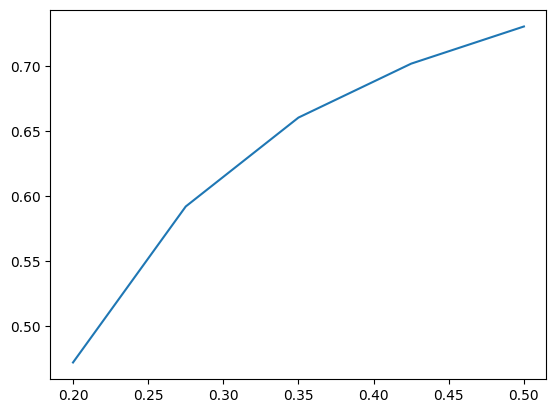

In [26]:
plt.plot(rho02, np.asarray(diff1))

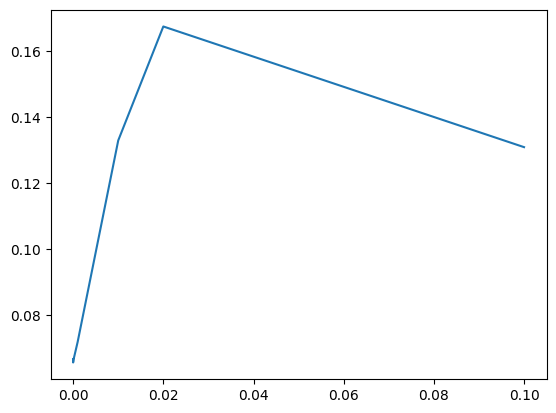

In [19]:
plt.plot(rho0, np.asarray(diff))

In [22]:
rho01

array([0.        , 0.06666667, 0.13333333, 0.2       ])

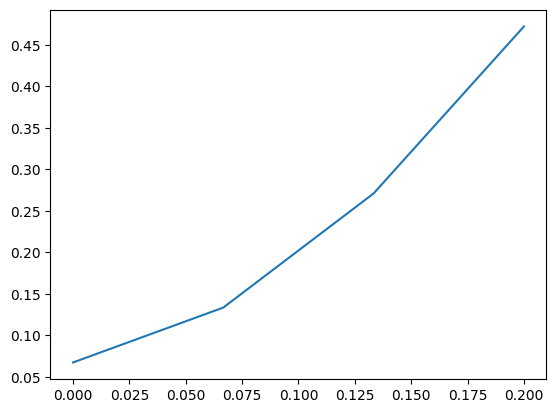

In [21]:
plt.plot(rho01, np.asarray(diff1))